In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta       
import seaborn as sns

Get an idea of what the data we're working with looks like

In [58]:
df = pd.read_csv('ENB2012_data.csv')
df

#note to self :

#input parameters
# X1 Relative Compactness
# X2 Surface Area
# X3 Wall Area
# X4 Roof Area
# X5 Overall Height
# X6 Orientation
# X7 Glazing Area
# X8 Glazing Area Distribution

# outputs
# y1 Heating Load
# y2 Cooling Load




,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [59]:
def check_clean_data(df):
    print(df.isnull().sum()) #check for null values
    print("\n(Rows, Columns)", df.shape) #check for missing values

    print("\nCheck for empty values")
    print(df[df.eq("?").any(1)]) #check for missing values
check_clean_data(df)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

(Rows, Columns) (768, 10)

Check for empty values
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []


/var/folders/b7/bq0h81m57s1g_18vh23zv22r0000gn/T/ipykernel_12564/1635922065.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print(df[df.eq("?").any(1)]) #check for missing values


In [60]:
def standardize_data(df):
    feature_cols = [col for col in df.columns if col not in ['Y1', 'Y2']]
    for col in feature_cols:
        df[col] = (df[col] - df[col].mean())/df[col].std()
    return df
df = standardize_data(df)
df


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.759300,-1.813393,15.55,21.33
1,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.759300,-1.813393,15.55,21.33
2,2.040447,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.759300,-1.813393,15.55,21.33
3,2.040447,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.759300,-1.813393,15.55,21.33
4,1.284142,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.759300,-1.813393,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,-1.173848,1.274794,0.561586,0.971879,-0.999349,1.340767,1.243239,1.410417,17.88,21.40
764,-1.362924,1.552931,1.123171,0.971879,-0.999349,-1.340767,1.243239,1.410417,16.54,16.88
765,-1.362924,1.552931,1.123171,0.971879,-0.999349,-0.446922,1.243239,1.410417,16.44,17.11
766,-1.362924,1.552931,1.123171,0.971879,-0.999349,0.446922,1.243239,1.410417,16.48,16.61


In [61]:
def df_stats(df):
    print(df.describe().round(6))
df_stats(df)

               X1          X2          X3          X4          X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.000000   -0.000000    0.000000    0.000000    0.000000    0.000000   
std      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
min     -1.362924   -1.784712   -1.684757   -1.469119   -0.999349   -1.340767   
25%     -0.772061   -0.741698   -0.561586   -0.791064   -0.999349   -0.670384   
50%     -0.133929    0.023178    0.000000    0.158213    0.000000    0.000000   
75%      0.622376    0.788055    0.561586    0.971879    0.999349    0.670384   
max      2.040447    1.552931    2.246342    0.971879    0.999349    1.340767   

               X7          X8          Y1          Y2  
count  768.000000  768.000000  768.000000  768.000000  
mean     0.000000   -0.000000   22.307201   24.587760  
std      1.000000    1.000000   10.090196    9.513306  
min     -1.759300   -1.813393    6.010000   10

In [62]:
#Function to compute probability density function of beta distribution parameterized by a and b
def Beta_distribution(theta_values, a,b):
    Beta = lambda theta,a,b: ((theta**(a-1))*((1-theta)**(b-1)))/beta(a,b)
    theta_vals = np.linspace(0.1,0.99,100)
    p_vals = Beta(theta_vals, a, b)
    for index in range(len(p_vals)):
        p_vals[index] = p_vals[index]*100
        
    return [theta_vals, p_vals, a, b]


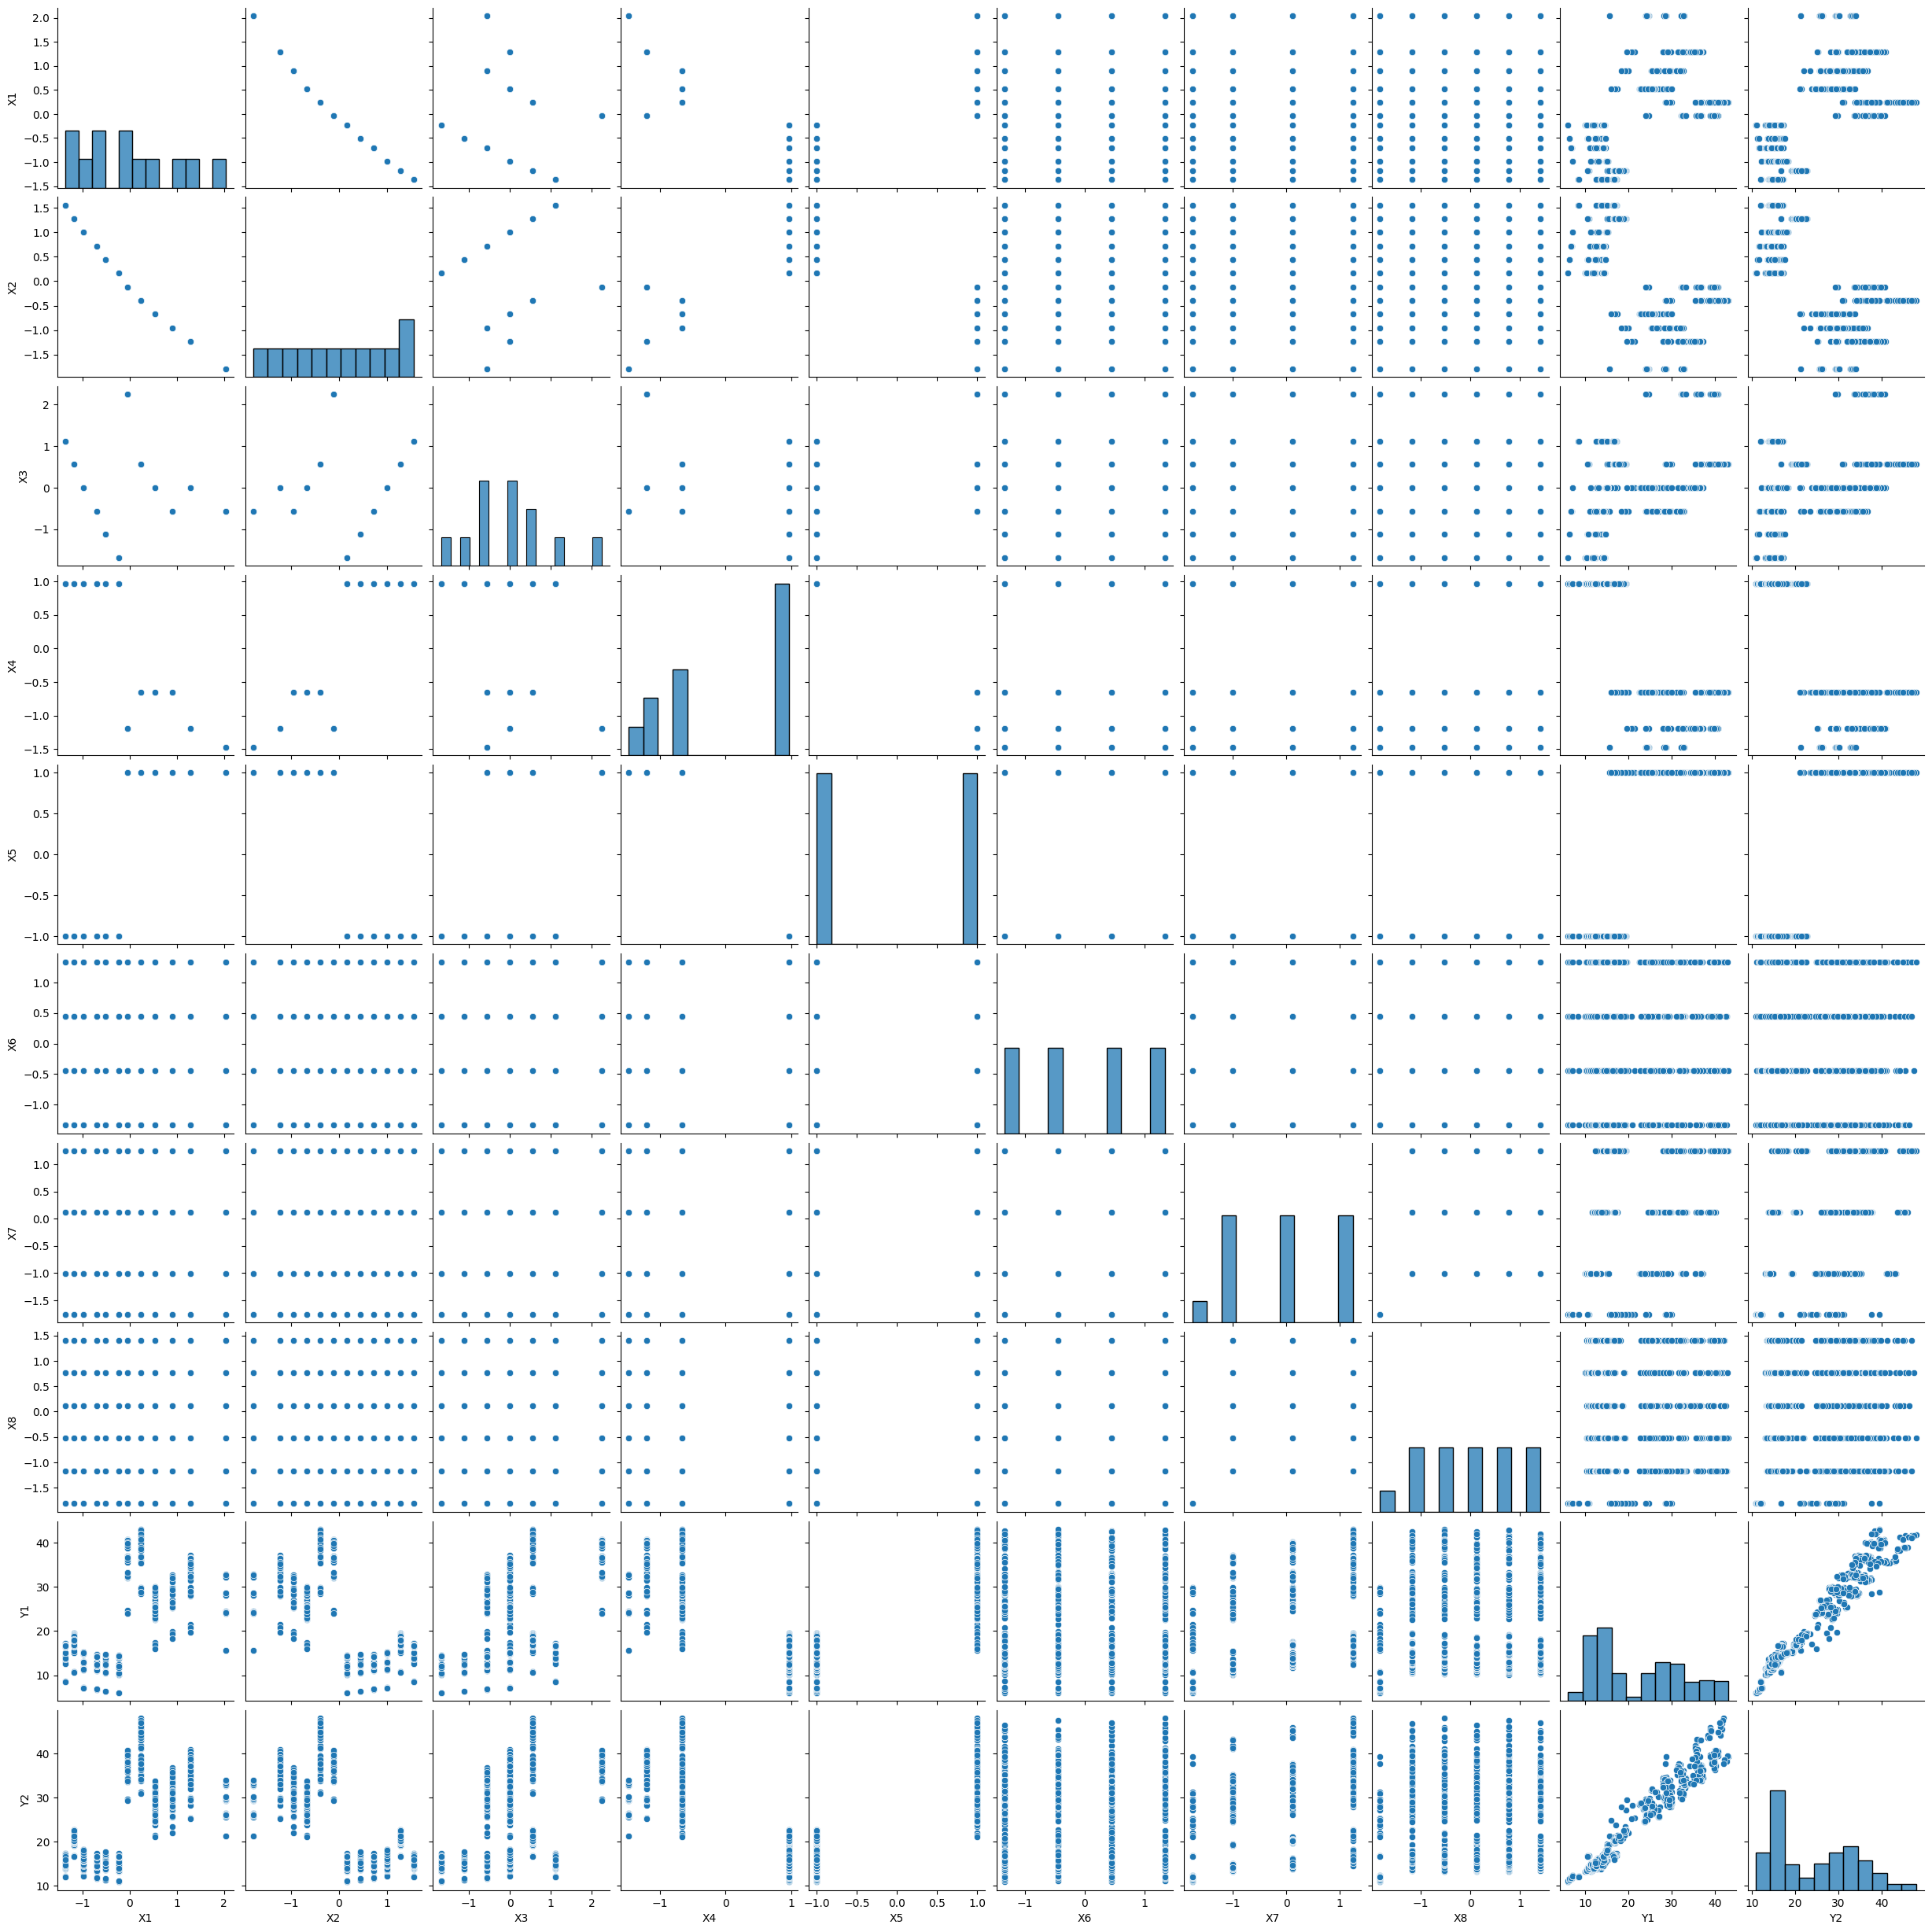

In [63]:
sns.pairplot(df)

Finding Correlation between features

In [64]:
corr_df = df.corr().round(6)
corr_df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.991901,-0.203782,-0.868823,0.827747,-0.000000,-0.000000,-0.000000,0.622272,0.634339
X2,-0.991901,1.000000,0.195502,0.880720,-0.858148,0.000000,-0.000000,-0.000000,-0.658120,-0.672999
X3,-0.203782,0.195502,1.000000,-0.292316,0.280976,0.000000,0.000000,0.000000,0.455671,0.427117
X4,-0.868823,0.880720,-0.292316,1.000000,-0.972512,0.000000,0.000000,-0.000000,-0.861828,-0.862547
X5,0.827747,-0.858148,0.280976,-0.972512,1.000000,-0.000000,-0.000000,-0.000000,0.889431,0.895785
X6,-0.000000,0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,0.000000,-0.002587,0.014290
X7,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.212964,0.269841,0.207505
X8,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.212964,1.000000,0.087368,0.050525
Y1,0.622272,-0.658120,0.455671,-0.861828,0.889431,-0.002587,0.269841,0.087368,1.000000,0.975862
Y2,0.634339,-0.672999,0.427117,-0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


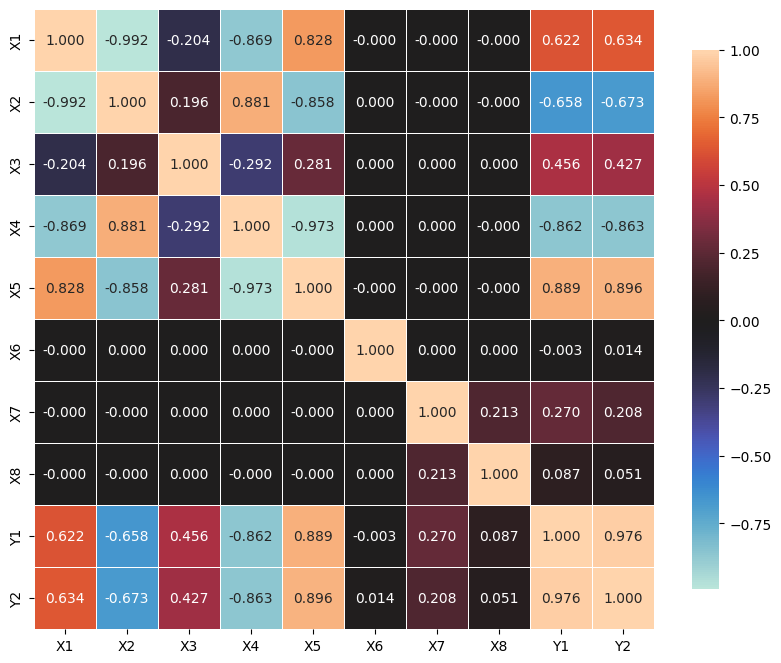

In [65]:
#code taken from https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4#:~:text=Positive%20Correlation%3A%20means%20that%20if,they%20have%20a%20linear%20relationship.

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.3f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()

correlation_heatmap(df)

Convert to Numpy for easier computation

In [66]:
features = df.copy()
features = features.drop(columns=["Y1", "Y2"])


In [67]:
labels = df.copy()
labels = labels.drop(columns=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"])

Convert to numpy

In [68]:
features = features.to_numpy()
labels = labels.to_numpy()


In [69]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh


In [70]:
model = LinearRegression()
yh = model.fit(features, labels).predict(features)
print("yh",yh)
print("y", labels)

#error


yh [[23.21779615 26.33923819]
 [23.2347057  26.48666176]
 [23.25161525 26.63408533]
 ...
 [19.52389269 20.07587404]
 [19.54080224 20.22329761]
 [19.55771179 20.37072117]]
y [[15.55 21.33]
 [15.55 21.33]
 [15.55 21.33]
 ...
 [16.44 17.11]
 [16.48 16.61]
 [16.64 16.03]]


/var/folders/b7/bq0h81m57s1g_18vh23zv22r0000gn/T/ipykernel_12564/3128439069.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
